# Workshop on linear mixed models (LMM) to test serial biases in the behavioral data of [Stein et al. (2020)](https://doi.org/10.1038/s41467-020-18033-3)

Import the libraries needed

In [ ]:
# data management libraries
import pandas as pd
import numpy as np
# graphic libraries
import seaborn as sns
import matplotlib.pyplot as plt
# statistical models library 
import statsmodels.formula.api as smf

Let's first take a quick look at the behavioral data. Run the cells below. You can try it for different subjects or sessions:

In [ ]:
alldat = pd.read_pickle("rawdat_all.pkl")

print("Subjects available:")
alldat['subject'].unique()

In [ ]:
df = alldat[(alldat['subject']=='C09')&(alldat['session']=='1')] # pick one subject and session
N = len(df)

plt.plot(np.sin(df['response'])* (1 + 0.05*np.random.randn(N)), np.cos(df['response']) * (1 + 0.05*np.random.randn(N)), 'x')
plt.gca().set_aspect('equal')

This raw data gets processed to extract serial bias for each participant and session based on the methods described by [Stein et al. (2020)](https://doi.org/10.1038/s41467-020-18033-3). Here we will just load this preprocessed data:

In [ ]:
dat = pd.read_csv('serial_bias_data.csv')
dat.head()

Serial bias grows with delay, in the control group:

In [ ]:
sns.lineplot(data=dat, x='delay', y='SB', hue='group', ci=68)
plt.axhline(color='k', ls=':')

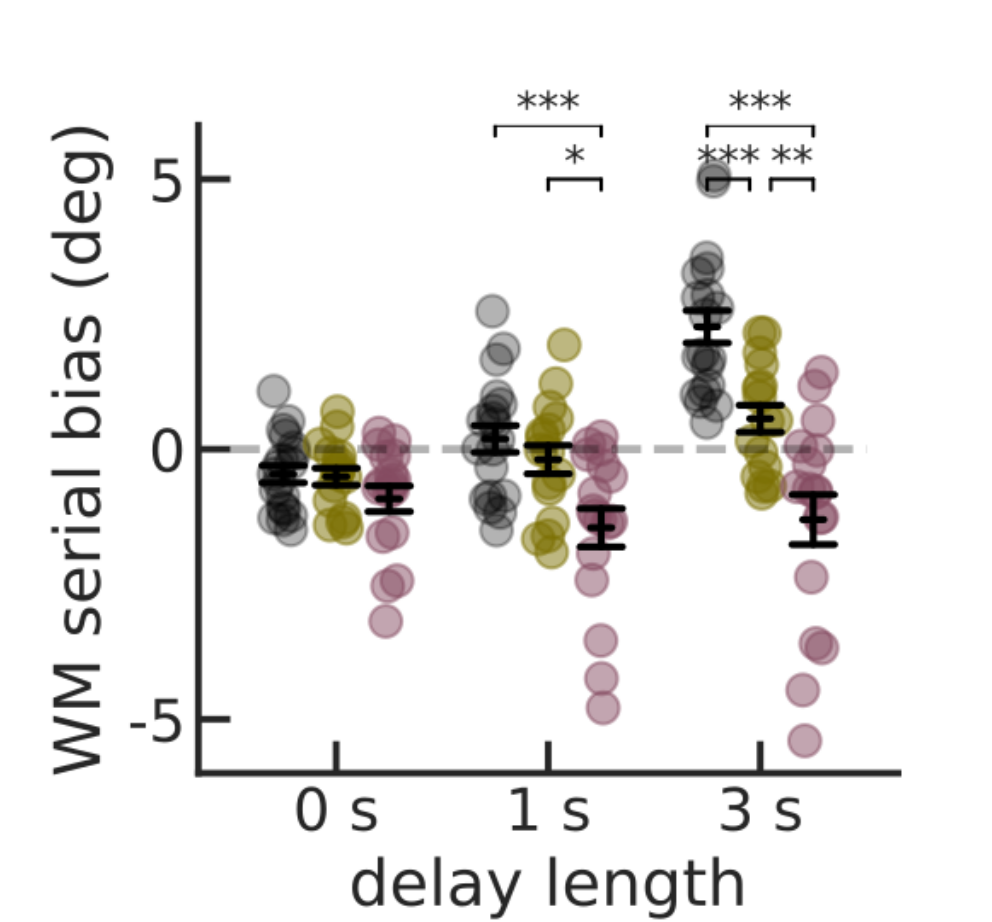

Now we will assess statistically these effects using linear models. These methods are very powerful to test complex experimental designs, and they generalize the simpler t-tests that are commonly used for scientific data. As a matter of fact, they are completely equivalent when dealing with just very simple designs, so if you learn to use these methods you can apply them in all instances for your data.

Because the data that we have (serial bias, SB) is a continuous quantity (a real number, positive and negative), we will use linear model as opposed to generalized linear models (e.g. logistic regression), which are used when dealing with other types of data (e.g. 0/1, true/false, right/left responses).

In order to run a linear model, we can use the `statsmodels` library in Python, in its `formula` sublibrary, which allows us to use a very compact definition for the model when our data is contained in a pandas DataFrame. Essentially, it is all summarized in a *formula* which follows a specific syntax:

    col0 ~ col1
is for instance the formula for the regression ${\rm col}_0 = \beta_0 + \beta_1 {\rm col}_1$, where **col0** and **col1** are column names of the pandas DataFrame.

### Exercise 1
So, let us try to run a simple model using only the data of the control group to test how serial biases depend on the delay duration. We want to assess the regression $SB = \beta_0 + \beta_1 delay$

In [ ]:
dfC = dat[dat['group']=='C']
mod = smf.ols(formula= ???? , data=dfC)
res = mod.fit()
print(res.summary())

What does this analysis show?

In [ ]:
sns.lineplot(data=dfC, x='delay', y='SB', ci=68)
plt.axhline(color='k', ls=':');

### Exercise 2

This formulation however allows us to address more complex designs, where there are more than one dependent variables. In our case, for the full data we expect that also the different patient groups will explain variance in the data. We can test that with a multiple regression model:

    col0 ~ col1 + col2
is for instance the formula for the regression ${\rm col}_0 = \beta_0 + \beta_1 {\rm col}_1 + \beta_2 {\rm col}_2$. Here we will model the full data (i.e. three groups: controls, encephalitis and schizophrenia) and try to explain it both with *delay* and with *group*

In [ ]:
mod = smf.ols(formula= ???? , data=dat)
res = mod.fit()
print(res.summary())

What is this saying?

In [ ]:
sns.lineplot(data=dat, x='delay', y='SB', hue='group', ci=68)
plt.axhline(color='k', ls=':');

### Exercise 3

However, this model is not really testing the difference that we are seeing in the plot. What we see is a difference in the slope of the curves for the three groups. The previous model is just testing a difference in the **mean** of the data for the 3 groups. In order to test the slope of the delay-regression curve for the two groups we need to test an **interaction**. An interaction tests a difference in the weight of one regressor for different values of another regressor. In this case, we want to test if $\beta_{delay}$ is different for different values of *group*. The syntax to test this is:

    col0 ~ col1*col2
which represents the linear model ${\rm col}_0 = \beta_0 + \beta_1 {\rm col}_1 + \beta_2 {\rm col}_2 + \beta_{1:2} {\rm col}_1 * {\rm col}_2$. 

Try now to test below the interaction between *delay* and *group* in our data:

In [ ]:
mod = smf.ols(formula= ???? , data=dat)
res = mod.fit()
print(res.summary())

In [ ]:
sns.lineplot(data=dat, x='delay', y='SB', hue='group', ci=68)
plt.axhline(color='k', ls=':');

### Exercise 4

Now, if you think about it, there is one important element in our data that we have neglected so far and probably contributes significantly to the variance of our measurements. This is the subject identity. Each subject contributes data at different delays and different sessions and it is likely that these values are related because they come from the same participant. Right now our method is assuming independence between all the measurements, which clearly this element of the design violates. It is important to account in our models for all possible sources of variability.

The way to include this *pairing* between measurements (in our case the pairing comes from the subject column of the DataFrame), we use **linear mixed models (LMM)**. LMMs can be modeled in Python in the *statsmodels* library using the **mixedlm** function. You can check the syntax online. This provides an easy access to these methods for some simple designs, if your designs are more complex you may need to switch to a library that access the much more powerful methods of the R language, for instance **pymer4**.

Here we will use the **mixedlm** function of *statsmodels*, which follows the same syntax as above for the formula but adds some options to specify the grouping factor (we call it *random effect*) and a formula for those random effects (*re_formula*):

In [ ]:
mod = smf.mixedlm(formula= ???? , data=dat, re_formula='1', groups='subject')
res = mod.fit()
print(res.summary())

In [ ]:
sns.lineplot(data=dat, x='delay', y='SB', hue='group', ci=68)
plt.axhline(color='k', ls=':');

### Exercise 5

The random effects formula indicates where you expect to see differences across participants. In the above code we said that participants differ in their mean serial bias (SB) values (`re_formula='1'`), but we could also assume that participants differ from one another in the dependence of their serial bias with delay. Can you write the formula for `re_formula` in the code above to test this? What do you observe?